In [11]:
import pandas as pd
import alphalens as al
from datetime import datetime

In [12]:
import pymysql
import warnings
warnings.filterwarnings("ignore")

In [13]:
con = pymysql.connect(host='172.24.6.39',
                     port=3306,
                     user='chronos',
                     password='chronos',
                     db='stock',
                     charset='gbk')

## st数据

In [22]:
st_data = pd.read_sql("select * from st_info where trans_date >= '20210104' and trans_date <= '20211231'", con)

In [23]:
## 其中st为是否st股票的标识，1表示该股票当天为st，0表示该股票当天不为st
st_data.head()

,trans_date,hjcode,st
0,20210104,000001.SZ,0
1,20210104,000002.SZ,0
2,20210104,000004.SZ,0
3,20210104,000005.SZ,0
4,20210104,000006.SZ,0


In [24]:
st_data['trans_date']= st_data['trans_date'].apply(lambda x: datetime.strptime(str(x), '%Y%m%d'))
st_data.rename(columns={'hjcode':'asset', 'trans_date':'date'}, inplace=True)
st_data.head()

,date,asset,st
0,2021-01-04,000001.SZ,0
1,2021-01-04,000002.SZ,0
2,2021-01-04,000004.SZ,0
3,2021-01-04,000005.SZ,0
4,2021-01-04,000006.SZ,0


In [25]:
st_data.to_csv('st_data_2021-2022.csv', index=False)

## 行业数据

In [26]:
# 行业数据提供中信一级行业
indus_data = pd.read_sql("select * from citics_industry_info where trans_date >= '20210104' and trans_date <= '20211231'", con)

In [27]:
# 其中hjcode为股票代码，first_industry_code为股票当日所属中信一级行业代码，first_industry_name为股票当日所属中信一级行业名称，trans_date为交易日期
indus_data['trans_date']= indus_data['trans_date'].apply(lambda x: datetime.strptime(str(x), '%Y%m%d'))
indus_data.rename(columns={'hjcode':'asset', 'trans_date':'date'}, inplace=True)
indus_data.head()

,asset,first_industry_code,first_industry_name,date
0,000001.SZ,40,银行,2021-01-04
1,000002.SZ,42,房地产,2021-01-04
2,000004.SZ,35,医药,2021-01-04
3,000005.SZ,20,电力及公用事业,2021-01-04
4,000006.SZ,42,房地产,2021-01-04


In [28]:
indus_data.to_csv('indus_data_2021-2022.csv', index=False)

## 行情数据

In [8]:
kline_data = pd.read_sql('select * from kline_day limit 100', con)

In [9]:
"""
注：价格数据为了保存精度统一乘10000，即实际价格为表中价格/10000
hjcode:股票代码
market:市场
open_price:开盘价
high_price:最高价
low_price:最低价
close_price:收盘价
turnover:成交金额
volume:成交量
trans_date:交易日
"""
kline_data.head()

,hjcode,market,open_price,high_price,low_price,close_price,turnover,volume,trans_date
0,000001.SZ,stock,133500.0,139300.0,133200.0,137000.0,2.856544e+09,208159255.0,20180102
1,000001.SZ,stock,137300.0,138600.0,132000.0,133300.0,4.006221e+09,296249838.0,20180103
2,000001.SZ,stock,133200.0,133700.0,131300.0,132500.0,2.454544e+09,185450948.0,20180104
3,000001.SZ,stock,132100.0,133500.0,131500.0,133000.0,1.603290e+09,121031272.0,20180105
4,000001.SZ,stock,132500.0,132900.0,128600.0,129600.0,2.806099e+09,215862081.0,20180108


## 股本数据

In [29]:
share_data = pd.read_sql("select * from shares_info where trans_date >= '20210104' and trans_date <= '20211231'", con)

In [30]:
"""
hjcode:股票代码
trans_date:交易日
circulation_a:A股流通股本
total_a:A股总股本
"""
share_data['trans_date']= share_data['trans_date'].apply(lambda x: datetime.strptime(str(x), '%Y%m%d'))
share_data.rename(columns={'hjcode':'asset', 'trans_date':'date'}, inplace=True)
share_data.head()

,asset,date,circulation_a,total_a
0,000001.SZ,2021-01-04,1.940575e+10,19405918198
1,000002.SZ,2021-01-04,9.714315e+09,9724196533
2,000004.SZ,2021-01-04,8.391868e+07,165052625
3,000005.SZ,2021-01-04,1.057946e+09,1058536842
4,000006.SZ,2021-01-04,1.348308e+09,1349995046


In [31]:
share_data.to_csv('share_data_2021-2022.csv', index=False)

# 因子示例

In [14]:
kline_data = pd.read_sql('select * from kline_day where trans_date >= 20220101 and trans_date <=20230101', con)

In [15]:
kline_data['trans_date'] = kline_data['trans_date'].apply(lambda x: datetime.strptime(str(x), '%Y%m%d'))
kline_data.rename(columns={'trans_date': 'date', 'hjcode': 'asset'}, inplace=True)
kline_data.head()

,asset,market,open_price,high_price,low_price,close_price,turnover,volume,date
0,000001.SZ,stock,191000.0,191000.0,184400.0,186000.0,2.891682e+09,155421643.0,2021-01-04
1,000001.SZ,stock,184000.0,184800.0,178000.0,181700.0,3.284607e+09,182135210.0,2021-01-05
2,000001.SZ,stock,180800.0,195600.0,180000.0,195600.0,3.648522e+09,193494512.0,2021-01-06
3,000001.SZ,stock,195200.0,199800.0,192300.0,199000.0,3.111275e+09,158418530.0,2021-01-07
4,000001.SZ,stock,199000.0,201000.0,193100.0,198500.0,2.348316e+09,119547322.0,2021-01-08


In [16]:
price_data = (kline_data[['asset', 'close_price', 'date']].pivot_table(values='close_price', index='date', columns='asset')/10000).sort_index()

In [17]:
price_data.head()

asset,000001.SZ,000002.SZ,000004.SZ,000005.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,...,873122.BJ,873132.BJ,873152.BJ,873167.BJ,873169.BJ,873223.BJ,873305.BJ,873339.BJ,873527.BJ,873576.BJ
date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,18.60,27.78,21.02,2.52,5.52,6.27,2.52,7.79,4.05,12.00,...,NaN,NaN,3.25,NaN,4.0,NaN,NaN,60.0,10.98,NaN
2021-01-05,18.17,27.91,20.88,2.47,5.44,5.64,2.57,7.77,4.05,11.85,...,NaN,NaN,3.25,NaN,4.0,NaN,5.70,60.0,10.98,NaN
2021-01-06,19.56,28.75,20.02,2.40,5.38,5.08,2.68,7.52,4.14,11.87,...,NaN,NaN,3.25,NaN,4.0,NaN,5.70,60.0,10.98,NaN
2021-01-07,19.90,28.79,19.05,2.38,5.22,4.57,2.59,7.55,3.99,11.11,...,NaN,NaN,3.25,NaN,4.0,NaN,5.70,60.0,10.98,NaN
2021-01-08,19.85,29.34,19.22,2.37,5.23,4.11,2.54,7.36,3.87,11.31,...,NaN,NaN,3.25,NaN,4.0,NaN,6.66,60.0,10.98,NaN


In [18]:
factor_data = price_data.pct_change(1).stack()

In [19]:
factor_data

date        asset    
2021-01-05  000001.SZ   -0.023118
            000002.SZ    0.004680
            000004.SZ   -0.006660
            000005.SZ   -0.019841
            000006.SZ   -0.014493
                           ...   
2021-12-31  873223.BJ    0.000000
            873305.BJ    0.000000
            873339.BJ    0.000000
            873527.BJ    0.022556
            873576.BJ    0.029412
Length: 1110955, dtype: float64

In [20]:
factor_data = al.utils.get_clean_factor_and_forward_returns(factor_data,
                                              price_data,
                                              groupby=None,
                                              binning_by_group=False,
                                              quantiles=5,
                                              bins=None,
                                              periods=(1, 5, 10),
                                              filter_zscore=20,
                                              groupby_labels=None,
                                              max_loss=0.35,
                                              zero_aware=False)

Dropped 4.3% entries from factor data: 4.3% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


In [21]:
factor_data

1D        5D       10D    factor  factor_quantile
date       asset                                                             
2021-01-05 000001.SZ  0.076500  0.155751  0.229499 -0.023118                1
           000002.SZ  0.030097  0.064135  0.120745  0.004680                4
           000004.SZ -0.041188 -0.106322 -0.002395 -0.006660                3
           000005.SZ -0.028340 -0.068826 -0.060729 -0.019841                2
           000006.SZ -0.011029 -0.055147  0.003676 -0.014493                2
...                        ...       ...       ...       ...              ...
2021-12-17 873223.BJ  0.000000  0.000000  0.000000  0.000000                4
           873305.BJ  0.000000 -0.026667 -0.020000  0.000000                4
           873339.BJ -0.499485 -0.638517 -0.418126  0.000000                4
           873527.BJ  0.014634 -0.041463 -0.004878  0.000000                4
           873576.BJ  0.000000  0.005618 -0.016854  0.000000                4

[1062685 rows x 5 columns]

## 获取IC序列

In [22]:
from alphalens import performance as perf
ic = perf.factor_information_coefficient(factor_data)

In [23]:
ic.head()

,1D,5D,10D
date,,,
2021-01-05,0.068404,0.151369,0.035820
2021-01-06,0.308417,0.241008,0.014753
2021-01-07,-0.135527,0.043476,-0.123651
2021-01-08,0.169225,0.143645,0.037768
2021-01-11,-0.052588,-0.008179,0.014336


Information Analysis


,1D,5D,10D
IC Mean,-0.027,-0.014,-0.012
IC Std.,0.118,0.105,0.094
Risk-Adjusted IC,-0.231,-0.137,-0.129
t-stat(IC),-3.514,-2.093,-1.958
p-value(IC),0.001,0.037,0.051
IC Skew,0.023,-0.361,-0.082
IC Kurtosis,1.255,0.524,0.659


<Figure size 640x480 with 0 Axes>

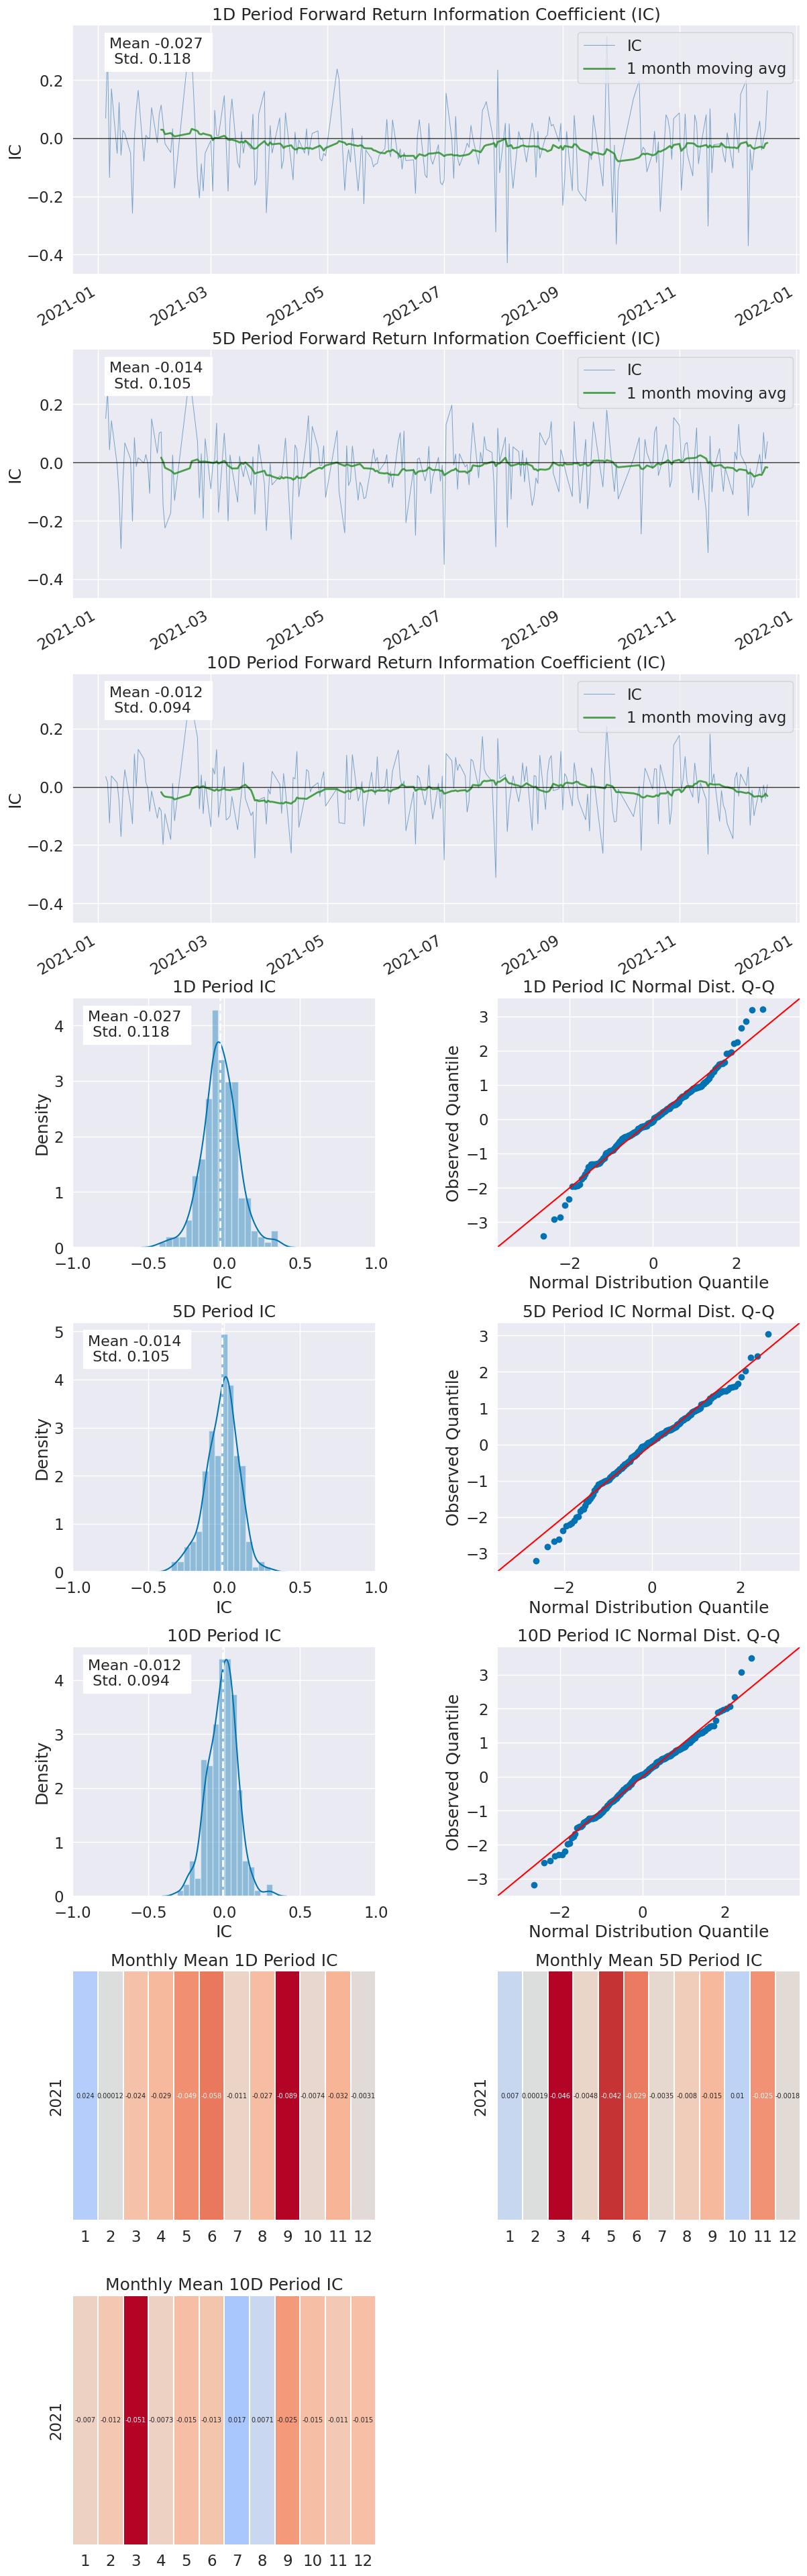

In [20]:
al.tears.create_information_tear_sheet(factor_data,
                                       group_neutral=False,
                                       by_group=False)

Returns Analysis


,1D,5D,10D
Ann. alpha,0.600,0.095,0.023
beta,-0.151,-0.114,-0.014
Mean Period Wise Return Top Quantile (bps),11.495,8.987,9.165
Mean Period Wise Return Bottom Quantile (bps),4.470,8.480,9.434
Mean Period Wise Spread (bps),7.025,0.712,-0.213


<Figure size 640x480 with 0 Axes>

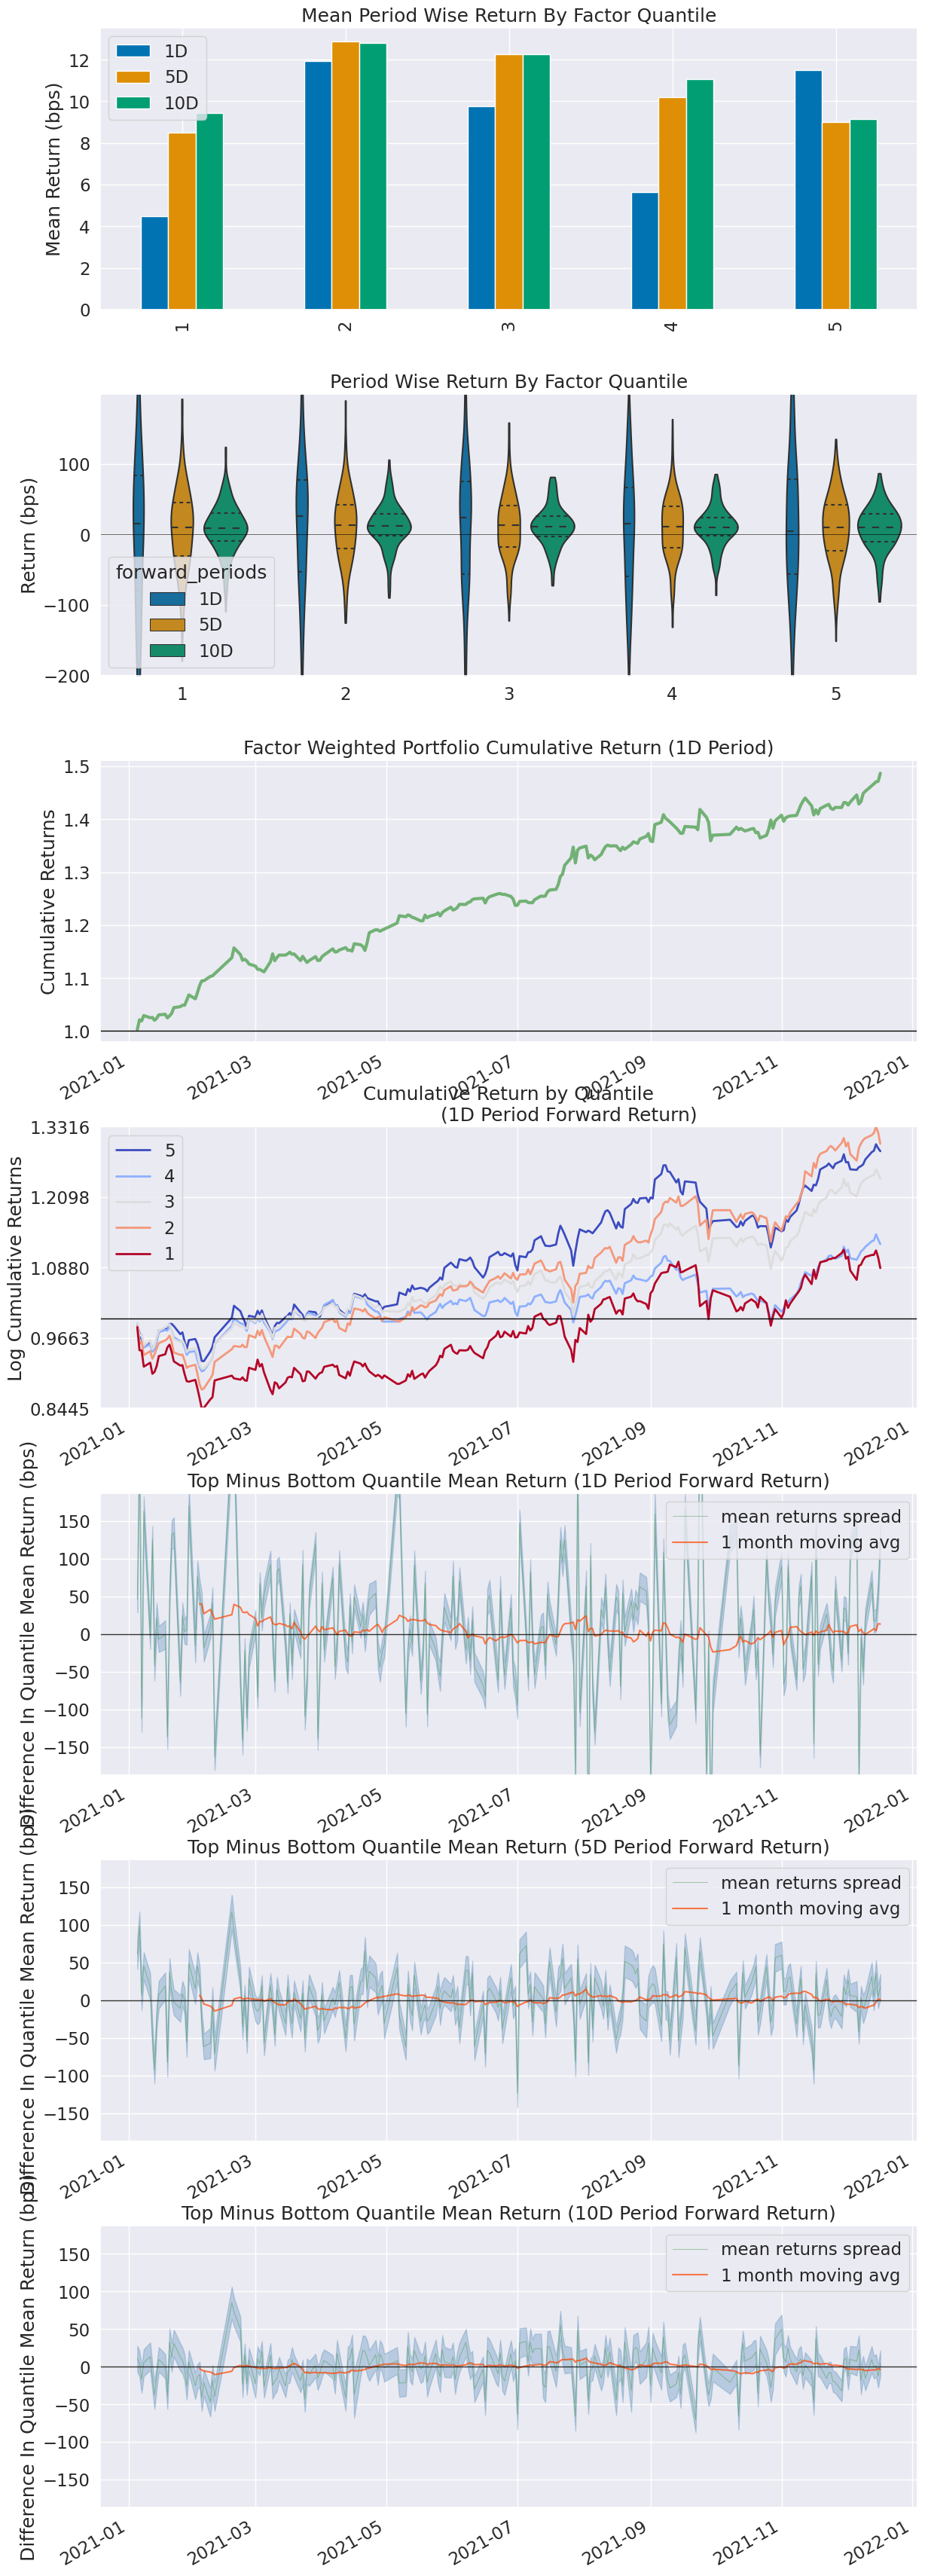

In [21]:
al.tears.create_returns_tear_sheet(factor_data,
                                   long_short=False,
                                   group_neutral=False)

## 获取收益序列

In [27]:
mean_quant_rateret_bydate = mean_quant_ret_bydate.apply(
    al.utils.rate_of_return,
    axis=0,
    base_period=mean_quant_ret_bydate.columns[0],
)

In [28]:
mean_quant_rateret_bydate

1D        5D       10D
factor_quantile date                                    
1               2021-01-05 -0.014891 -0.013751 -0.004326
                2021-01-06 -0.040355 -0.017935 -0.002495
                2021-01-07 -0.000530 -0.008893  0.001825
                2021-01-08 -0.029562 -0.005765  0.000278
                2021-01-11  0.007422  0.003816  0.001529
...                              ...       ...       ...
5               2021-12-13  0.009961  0.000707 -0.000169
                2021-12-14  0.001889  0.001361 -0.000500
                2021-12-15  0.008687  0.003118 -0.001105
                2021-12-16 -0.005304 -0.001124 -0.001598
                2021-12-17 -0.003930 -0.002776  0.000732

[1160 rows x 3 columns]

Turnover Analysis


,1D,5D,10D
Quantile 1 Mean Turnover,0.764,0.764,0.769
Quantile 2 Mean Turnover,0.784,0.787,0.787
Quantile 3 Mean Turnover,0.747,0.762,0.763
Quantile 4 Mean Turnover,0.799,0.795,0.797
Quantile 5 Mean Turnover,0.745,0.763,0.766


,1D,5D,10D
Mean Factor Rank Autocorrelation,-0.028,-0.017,-0.013


<Figure size 640x480 with 0 Axes>

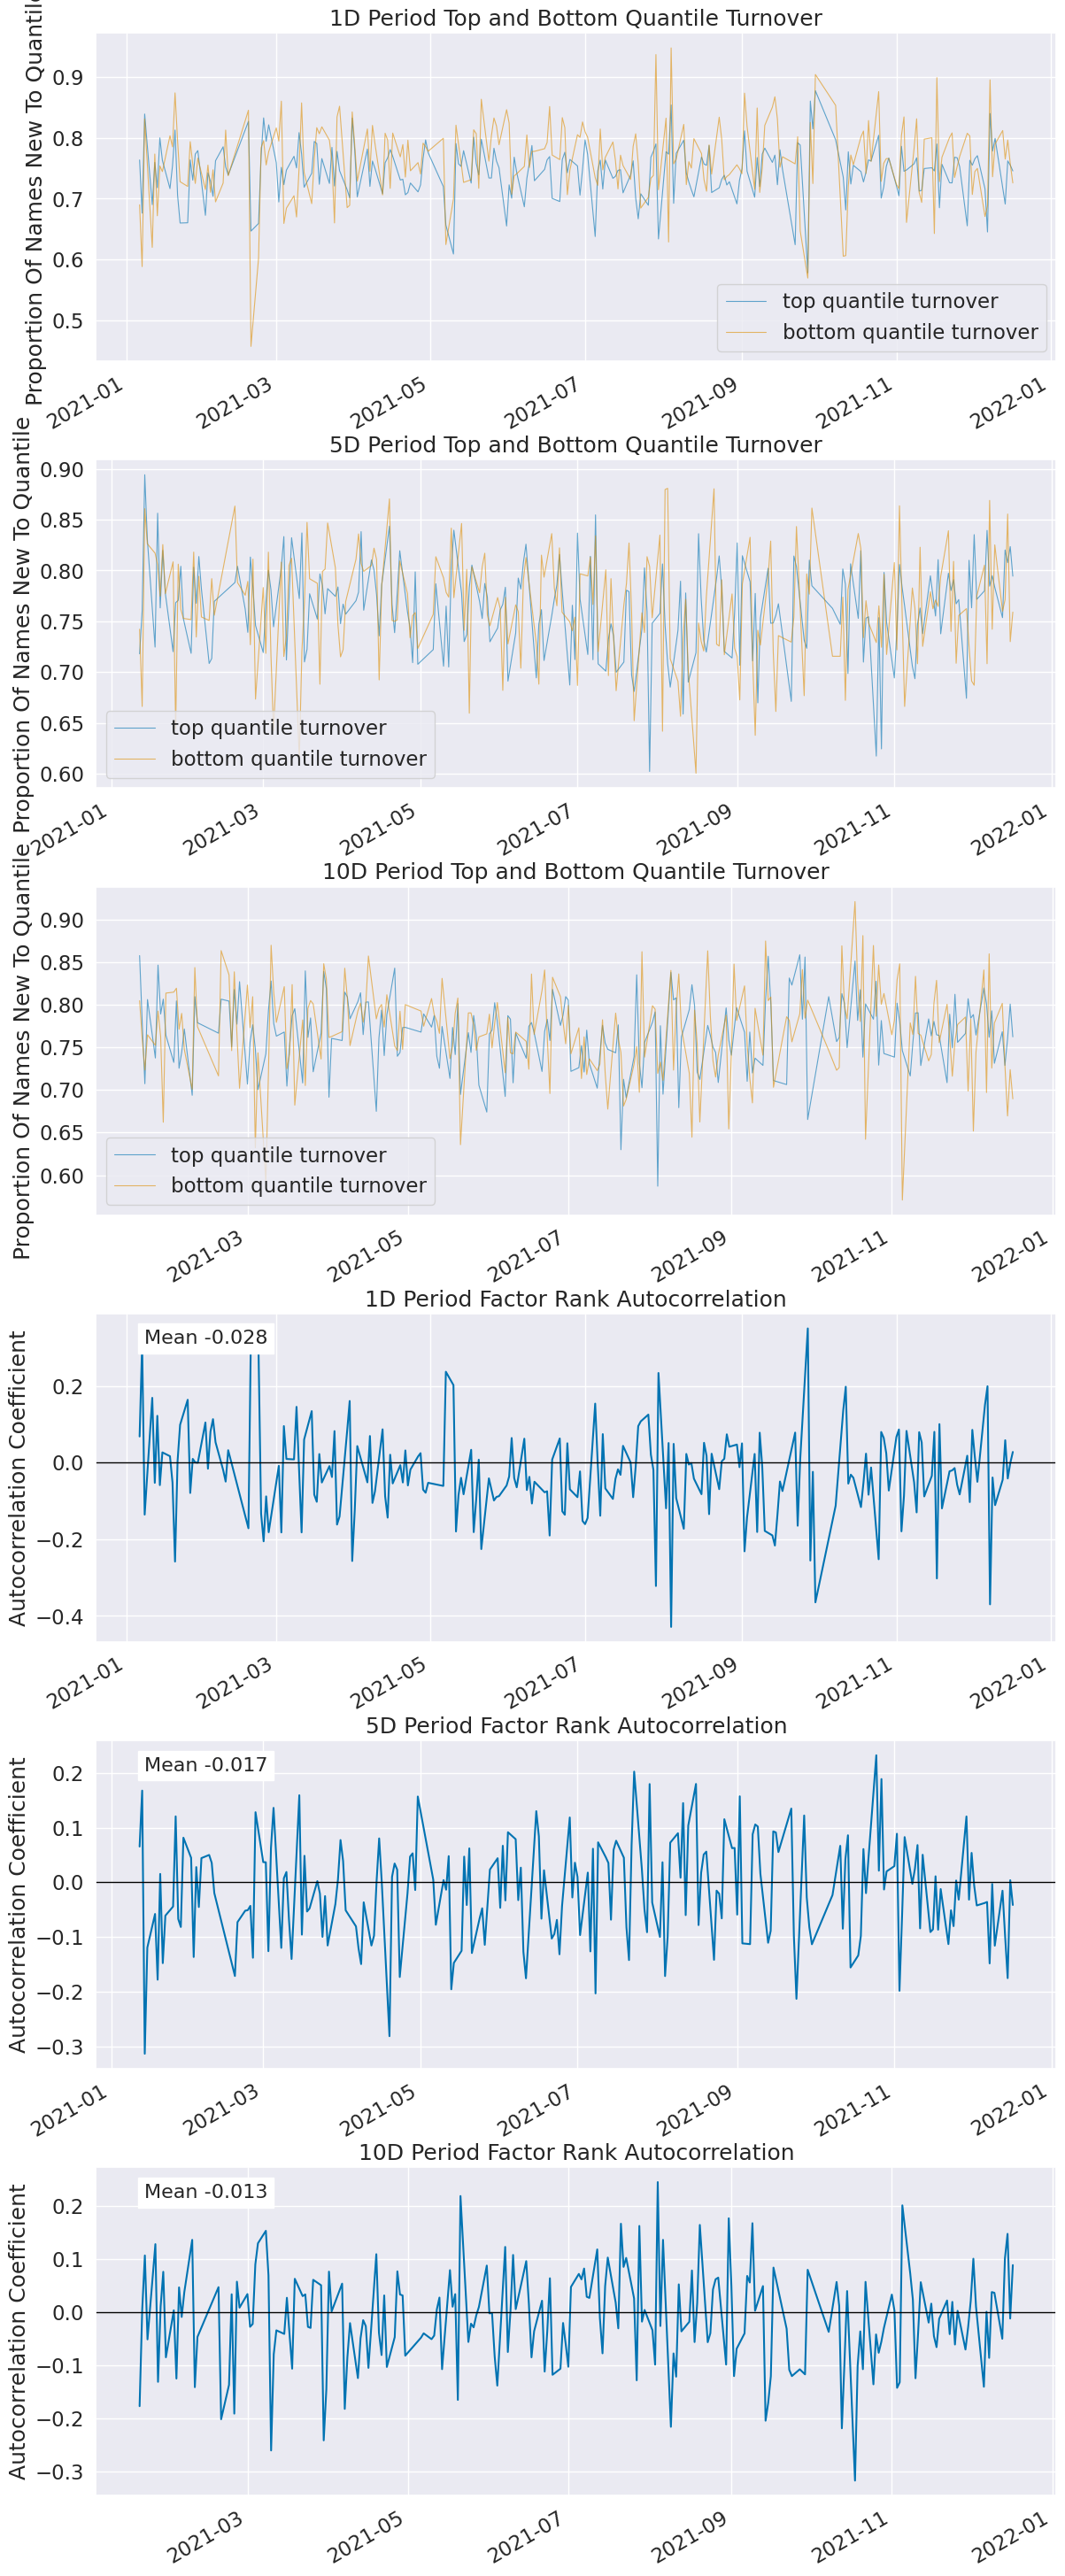

In [22]:
al.tears.create_turnover_tear_sheet(factor_data)